# Area of the Mandelbrot set


### 0 Init


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random

### 1 Mandelbrot

In [6]:
def mandel_number(x, y, max_iter=100):
    ''' Returns the number of iterations needed for the Mandelbrot map to get out of scope '''
    a1, b1 = 0, 0
    for f in range(max_iter):
        if (a1 * a1 + b1 * b1) >= 4:
            return f
        a, b = a1 * a1 - b1 * b1 + x, 2 * a1 * b1 + y
        a1, b1 = a, b
    return max_iter

def colors(x, y):
    ''' Calculates colors based on the number of iterations'''
    mandel_num = mandel_number(x, y)
    if mandel_num < 10:
        g = mandel_num / 10
        return (0.2,  0, 0.9*g)  
    else:
        g = mandel_num / 100
        return (0.2, 0, 0.9*g)


def mandelbrot_image(s=500, xrange=(-2, 1.5), yrange=(-1.5, 1.5)):
    ''' Creates an image of the Mandelbrot set'''
    # Empty array voor x,y coordinated with colors
    img = np.zeros((s, s, 3))
    
    x_vals = np.linspace(xrange[0], xrange[1], s)
    y_vals = np.linspace(yrange[0], yrange[1], s)
    
    # Loop over each pixel and color it based on the Mandelbrot numbers
    for i, x in enumerate(x_vals):
        for j, y in enumerate(y_vals):
            img[j, i] = colors(x, y)  

    # Toon de afbeelding
    plt.imshow(img, extent=(xrange[0], xrange[1], yrange[0], yrange[1]))
    plt.title("Mandelbrot Set Visualization")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.tight_layout()
    plt.show()



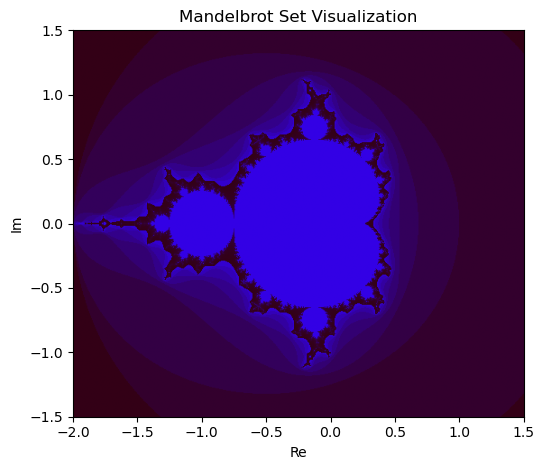

In [5]:
mandelbrot_image()

### 2 Monte Carlo

In [7]:
def inset(x,y):
    ''' Determine if a complex number is part of the Mandelbrot set'''
    mandel_num = mandel_number(x, y)
    if mandel_num > 20:
        return True
    else:
        return False
    
def monte_carlo(iter_num = 100000 ,xrange=(-2, 1.5), yrange=(-1.5, 1.5) ):
    ''' Approach the surface area of the Mandelbrot set by the Monte Carlo method'''
    x_min, x_max = xrange
    y_min, y_max = yrange
    region_area = (x_max - x_min) * (y_max - y_min)
    
    x_points = []
    y_points = []
    
    area_count = 0
    for i in range(iter_num):
        x = random.uniform(x_min,x_max)
        y = random.uniform(y_min,y_max)
        if inset(x, y):
            area_count += 1
            x_points.append(x)
            y_points.append(y)

    # Estimate the area of the Mandelbrot set
    mandel_area = (area_count/iter_num) * region_area
    
    # Plot the random points that are in the set
    plt.scatter(x_points, y_points, color="blue", s=0.1, label="Inside Mandelbrot")
    plt.xlabel("Re(c)")
    plt.ylabel("Im(c)")
    plt.title("Monte Carlo Sampling of the Mandelbrot Set")
    plt.xlim(-2, 1.5)
    plt.ylim(-1.5, 1.5)
    plt.axis("equal")
    plt.show()
    
    return mandel_area

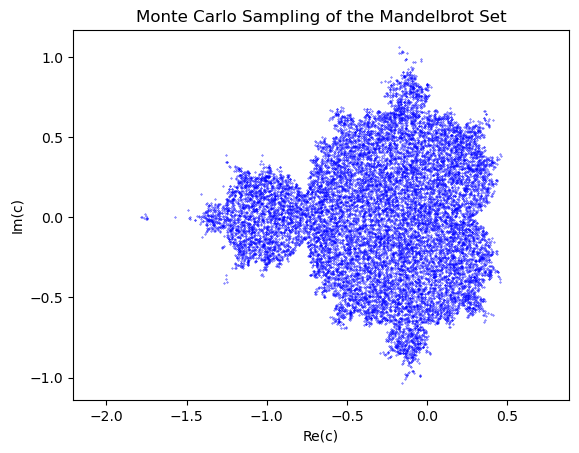

1.7343899999999999

In [8]:
monte_carlo()